# convert image to gray

In [1]:
# eilon is stupid
import math
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import turtle

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def find_middle(im, col_num):
    shape = im.shape
    lst = []
    for i in range(shape[0]):
        for j in range(shape[1]):
            lst.append(im[i, j])
    lst.sort()
    size = im.size
    mid = size//col_num
    sep = []
    for i in range(col_num-1):
        sep.append(lst[mid*(i+1)])
    return sep

def im2pixel(im, col_num):
    sep = find_middle(im, col_num)
    gap = 255/col_num
    zeros = np.zeros(im.shape)
    for i in range(col_num-2):
        zeros[(im >= sep[i]) & (im < sep[i+1])] = gap*(i+1)
    zeros[im >= sep[-1]] = 255
    return zeros

def im2numbers(im, col_num):
    sep = find_middle(im, col_num)
    zeros = np.zeros(im.shape)
    for i in range(col_num-2):
        zeros[(im >= sep[i]) & (im < sep[i+1])] = col_num-i-2
    zeros[im < sep[0]] = col_num-1
    return zeros

def question(quest, list_of_ans):
    answer = input(quest)
    while answer not in list_of_ans:
        print('The answer must be one of the followers: ', ', '.join(list_of_ans))
        answer = input(quest)
    return answer

# Shrinking image - By lines

In [2]:
def image_shrink_lines(im, lines, columns):
    shape = im.shape
    lin_fac = shape[0]//lines
    col_fac = shape[1]//columns
    new_mat = np.zeros((shape[0]//lin_fac, shape[1]//col_fac))
    for i in range(new_mat.shape[0]):
        for j in range(new_mat.shape[1]):
            line_range = range(i*lin_fac,min((i+1)*lin_fac,im.shape[0]))
            col_range = range(j*col_fac,min((j+1)*col_fac,im.shape[1]))
            new_mat[i,j] = im[i*lin_fac:min((i+1)*lin_fac,im.shape[0]),j*col_fac:min((j+1)*col_fac,im.shape[1])].mean()
    return new_mat

# Shrinking image - By pixels number

In [3]:
def image_shrink_pixels(im, pixels):
    shape = im.shape
    line = math.floor((pixels//(shape[1]/shape[0]))**0.5)
    col = math.floor((pixels//(shape[0]/shape[1]))**0.5)
    lin_fac = math.ceil(shape[0]/line)
    col_fac = math.ceil(shape[1]/col)
    new_mat = np.zeros((shape[0]//lin_fac, shape[1]//col_fac))
    for i in range(new_mat.shape[0]):
        for j in range(new_mat.shape[1]):
            line_range = range(i*lin_fac,min((i+1)*lin_fac,im.shape[0]))
            col_range = range(j*col_fac,min((j+1)*col_fac,im.shape[1]))
            new_mat[i,j] = im[i*lin_fac:min((i+1)*lin_fac,im.shape[0]),j*col_fac:min((j+1)*col_fac,im.shape[1])].mean()
    return new_mat

# Draw Cubes

In [4]:
def draw_dice(size, dot_size, num_of_dots):

    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.penup()
    
    if num_of_dots == 0:
        turtle.left(90)
#         turtle.forward(size*11/10)
    
    if num_of_dots == 1:
        turtle.left(180)
        turtle.forward(size/2)
        turtle.right(90)
        turtle.forward(size/2)
        turtle.dot(dot_size)
#         turtle.right(45)
#         turtle.forward(size*2**0.5/2)
#         turtle.left(45)
#         turtle.forward(size/10)
        
    if num_of_dots == 2:
        turtle.left(180)
        turtle.forward(size/2)
        turtle.right(90)
        turtle.forward(size/4)
        turtle.dot(dot_size)
        turtle.forward(size/2)
        turtle.dot(dot_size)
#         turtle.forward(size/4+size/10)
#         turtle.right(90)
#         turtle.forward(size/2)
#         turtle.left(90)
        
    if num_of_dots == 3:
        turtle.left(135)
        turtle.forward(size*2**0.5/4)
        turtle.dot(dot_size)
        turtle.forward(size*2**0.5/4)
        turtle.dot(dot_size)
        turtle.forward(size*2**0.5/4)
        turtle.dot(dot_size)
        turtle.right(45)
#         turtle.forward(size/4+size/10)
#         turtle.right(90)
#         turtle.forward(size*3/4)
#         turtle.left(90)
        
        
    if num_of_dots == 4:
        turtle.left(135)
        turtle.forward(size*2**0.5/4)
        turtle.dot(dot_size)
        turtle.left(45)
        turtle.forward(size/2)
        turtle.dot(dot_size)
        turtle.right(90)
        turtle.forward(size/2)
        turtle.dot(dot_size)
        turtle.right(90)
        turtle.forward(size/2)
        turtle.dot(dot_size)
#         turtle.forward(size/4)
        turtle.left(90)
#         turtle.forward(size/4+size/10)
        
    if num_of_dots == 5:
        turtle.left(135)
        turtle.forward(size*2**0.5/4)
        turtle.dot(dot_size)
        turtle.left(45)
        turtle.forward(size/2)
        turtle.dot(dot_size)
        turtle.right(90)
        turtle.forward(size/2)
        turtle.dot(dot_size)
        turtle.right(90)
        turtle.forward(size/2)
        turtle.dot(dot_size)
        turtle.right(135)
        turtle.forward(size*2**0.5/4)
        turtle.dot(dot_size)
        turtle.right(135)
#         turtle.left(180)
#         turtle.forward(size*2**0.5/2)
#         turtle.left(45)
#         turtle.forward(size/10)
        
    if num_of_dots == 6:
        turtle.left(180)
        turtle.forward(size/4)
        turtle.right(90)
        turtle.forward(size/6)
        turtle.dot(dot_size)
        turtle.forward(size/3)
        turtle.dot(dot_size)
        turtle.forward(size/3)
        turtle.dot(dot_size)
        turtle.left(90)
        turtle.forward(size/2)
        turtle.dot(dot_size)
        turtle.left(90)
        turtle.forward(size/3)
        turtle.dot(dot_size)
        turtle.forward(size/3)
        turtle.dot(dot_size)
        turtle.left(180)
#         turtle.forward(size*5/6+size/10)
#         turtle.right(90)
#         turtle.forward(size*3/4)
#         turtle.left(90)

#         turtle.left(180)
#         turtle.forward(size/4)
#         turtle.right(90)
#         turtle.forward(size/5)
#         turtle.dot(dot_size)
#         turtle.forward(size*1.5/5)
#         turtle.dot(dot_size)
#         turtle.forward(size*1.5/5)
#         turtle.dot(dot_size)
#         turtle.left(90)
#         turtle.forward(size/2)
#         turtle.dot(dot_size)
#         turtle.left(90)
#         turtle.forward(size*1.5/5)
#         turtle.dot(dot_size)
#         turtle.forward(size*1.5/5)
#         turtle.dot(dot_size)
#         turtle.left(180)
#         turtle.forward(size*4/5+size/10)
#         turtle.right(90)
#         turtle.forward(size*3/4)
#         turtle.left(90)

        
#     turtle.pendown()

# Draw Cubes 2

In [5]:
def draw_dice_2(size, dot_size, num_of_dots, height, width):

    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.left(90)
    turtle.forward(size)
    turtle.penup()
    
#     if num_of_dots == 0:
#         turtle.left(90)
#         turtle.forward(size*11/10)
    
    if num_of_dots == 1:
        turtle.goto(width + size/2, height + size/2)
        turtle.dot(dot_size)
        
    if num_of_dots == 2:
        turtle.goto(width + size/4, height + size/2)
        turtle.dot(dot_size)
        turtle.goto(width + size*3/4, height + size/2)
        turtle.dot(dot_size)
        
    if num_of_dots == 3:
        turtle.goto(width + size/4, height + size/4)
        turtle.dot(dot_size)
        turtle.goto(width + size/2, height + size/2)
        turtle.dot(dot_size)
        turtle.goto(width + size*3/4, height + size*3/4)
        turtle.dot(dot_size)
        
    if num_of_dots == 4:
        turtle.goto(width + size/4, height + size/4)
        turtle.dot(dot_size)
        turtle.goto(width + size*3/4, height + size/4)
        turtle.dot(dot_size)
        turtle.goto(width + size*3/4, height + size*3/4)
        turtle.dot(dot_size)
        turtle.goto(width + size/4, height + size*3/4)
        turtle.dot(dot_size)
        
    if num_of_dots == 5:
        turtle.goto(width + size/4, height + size/4)
        turtle.dot(dot_size)
        turtle.goto(width + size*3/4, height + size/4)
        turtle.dot(dot_size)
        turtle.goto(width + size*3/4, height + size*3/4)
        turtle.dot(dot_size)
        turtle.goto(width + size/4, height + size*3/4)
        turtle.dot(dot_size)
        turtle.goto(width + size/2, height + size/2)
        turtle.dot(dot_size)
        
    if num_of_dots == 6:
        turtle.goto(width + size/6, height + size/4)
        turtle.dot(dot_size)
        turtle.goto(width + size/2, height + size/4)
        turtle.dot(dot_size)
        turtle.goto(width + size*5/6, height + size/4)
        turtle.dot(dot_size)
        turtle.goto(width + size/6, height + size*3/4)
        turtle.dot(dot_size)
        turtle.goto(width + size/2, height + size*3/4)
        turtle.dot(dot_size)
        turtle.goto(width + size*5/6, height + size*3/4)
        turtle.dot(dot_size)
        
    turtle.left(90)

# show dice paiting

In [6]:
def show_dice_picture(im, size, dot_size, height, width):
    turtle.penup()
    turtle.goto(width,height)
    turtle.pendown()
    new_height = height
    for i in range(im.shape[0]):
        new_width = width
        for j in range(im.shape[1]):
            draw_dice_2(size, dot_size, im[i,j], new_height, new_width) 
            new_width += size*11/10
            turtle.goto(new_width,new_height)
            turtle.pendown()
        turtle.penup()
        new_height -= size*11/10
        turtle.goto(width,new_height)
#         turtle.left(180)
#         turtle.forward((size*11/10)*(im.shape[1]))
#         turtle.left(90)
#         turtle.forward(size*11/10)
#         turtle.left(90)
        turtle.pendown()

# Final

In [7]:
def show_picture(file):
    colors_num = int(input('How many colors do you want?'))
    original_file = 'files/'+  file
    im = imageio.imread(original_file)
    im_gray = rgb2gray(im)
    print('image shape: ' + str(im.shape))
    ans_1 = question('Do you want to choose by pixels number or line &columns? (p/lc) ', ['p', 'lc'])
    
    if ans_1 == 'p':
        pixels = int(input('How many pixels do you want? '))
        im_shrink = image_shrink_pixels(im, pixels)
    else:
        print('max height (recommended): 60, max width (recommended): 115')
        lines = int(input('How many lines do you want? '))
        columns = int(input('How many columns do you want? '))
        im_shrink = image_shrink_lines(im, lines, columns)
    im_pixel = im2pixel(im_shrink, colors_num)
    im_num = im2numbers(im_pixel, colors_num)
    
    ans_2 = question('do you want to see the original photo? (yes/no) ', ['yes', 'no'])
    ans_3 = question('do you want to see the new photo? (yes/no) ', ['yes', 'no'])
    
    if ans_2 == 'yes':
        plt.figure()
        plt.imshow(im, cmap=plt.cm.gray)
        plt.show() 
    if ans_3 == 'yes':    
        plt.figure()
        plt.imshow(im_pixel, cmap=plt.cm.gray)
        plt.show()
        print('Image size: ' + str(im_pixel.shape))
    
    ans_4 = question("do you want to create a new file of the image's pixels? (yes/no) ", ['yes', 'no'])
    
    if ans_4 == 'yes':  
        file_name = input("choose file's name: ") + '.csv'
        path = 'export files - csv/' + file_name
        df = pd.DataFrame(im_num)
        df.to_csv(path_or_buf=path, index=False)
        
    ans_5 = 0   
    if colors_num <= 7:
        ans_5 = question('do you want to see the new photo as dice painting? (yes/no) ', ['yes', 'no'])
    
    if ans_5 == 'yes':
        file_name = input("choose file's name: ") + '.eps'
        path = "export files - eps/" + file_name
        size=12
        turtle.speed(0)
        height = 386
        width = -765
#         window = turtle.Screen()
#         window.setup(width=im_num.shape[1]*size*11/10, height=im_num.shape[0]*size*11/10)
        turtle.penup()
#         turtle.goto(-im_num.shape[1]*size*11/10//2, im_num.shape[0]*size*11/10//2)
        if im_pixel.shape[0]>= height and im_pixel.shape[1] >= abs(width)*2:
            new_height = height
            new_width = width
        elif im_pixel.shape[0]>= height*2:
            new_height = height
            new_width = im_pixel.shape[1]/115*width
        elif im_pixel.shape[1]>= abs(width)*2:
            new_height = im_pixel.shape[0]/60*height
            new_width = width
        else:
            new_height = im_pixel.shape[0]/60*height
            new_width = im_pixel.shape[1]/115*width
        turtle.goto(new_width, new_height)
        turtle.pendown()
        show_dice_picture(im_num, size, size/3, new_height, new_width)
        turtle.getcanvas().postscript(file=path)
        turtle.done()

# Create Pictures

How many colors do you want?6
image shape: (1200, 1600, 3)
Do you want to choose by pixels number or line &columns? (p/lc) p
How many pixels do you want? 100
do you want to see the original photo? (yes/no) no
do you want to see the new photo? (yes/no) yes


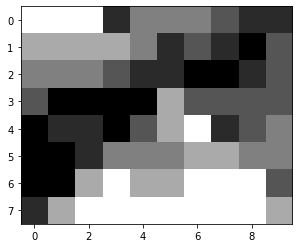

Image size: (8, 10)
do you want to create a new file of the image's pixels? (yes/no) no
do you want to see the new photo as dice painting? (yes/no) yes
choose file's name: as


In [8]:
file = 'WhatsApp Image 2022-09-07 at 17.14.23.jpeg'
show_picture(file)

In [ ]:
show_picture('jack.jpg')


In [ ]:
show_picture('Refael_3.jpeg')

In [ ]:
num = np.array([[1,2,3],[4,5,6]])
# num[::2, ::2] = 3
print(num)
turtle.speed(5)

size = 12.5
div =  3

# turtle.penup()
# turtle.goto(0,0)
# turtle.pendown()
show_dice_picture(num, size, 3.5, 0,0)

# draw_dice(size, size/div, 0)
# draw_dice(size, size/div, 1)
# draw_dice(size, size/div, 2)
# draw_dice(size, size/div, 3)
# draw_dice(size, size/div, 4)
# draw_dice(size, size/div, 5)
# draw_dice(size, size/div, 6)
# draw_dice(size, 4, 6)
# draw_dice(size, 4, 6)
# draw_dice(size, 4, 6)
# draw_dice(size, 4, 6)
turtle.done()